In [1]:
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
basePath ='./sims.TNG/TNG50-1/output'

from FunctionLib import *
from tqdm import tqdm
current_snap_num=40
import gc

In [2]:
subhalos_data=il.groupcat.loadSubhalos(basePath,current_snap_num,fields=['SubhaloMass','SubhaloPos'])
subhalo_mass=subhalos_data['SubhaloMass']
subhalo_pos=subhalos_data['SubhaloPos']
subhalo_pos=np.mod(subhalo_pos,35000)

In [4]:
subhalo_pos.min(axis=0)

array([ 0.00330921,  0.00271022,  0.00194761], dtype=float32)

In [4]:
idx = (subhalo_pos[:,1]>13000)&(subhalo_pos[:,1]<23000)&(subhalo_pos[:,2]>17700)&(subhalo_pos[:,2]<27700)&(subhalo_mass>10)
np.where(idx)[0].shape

(76,)

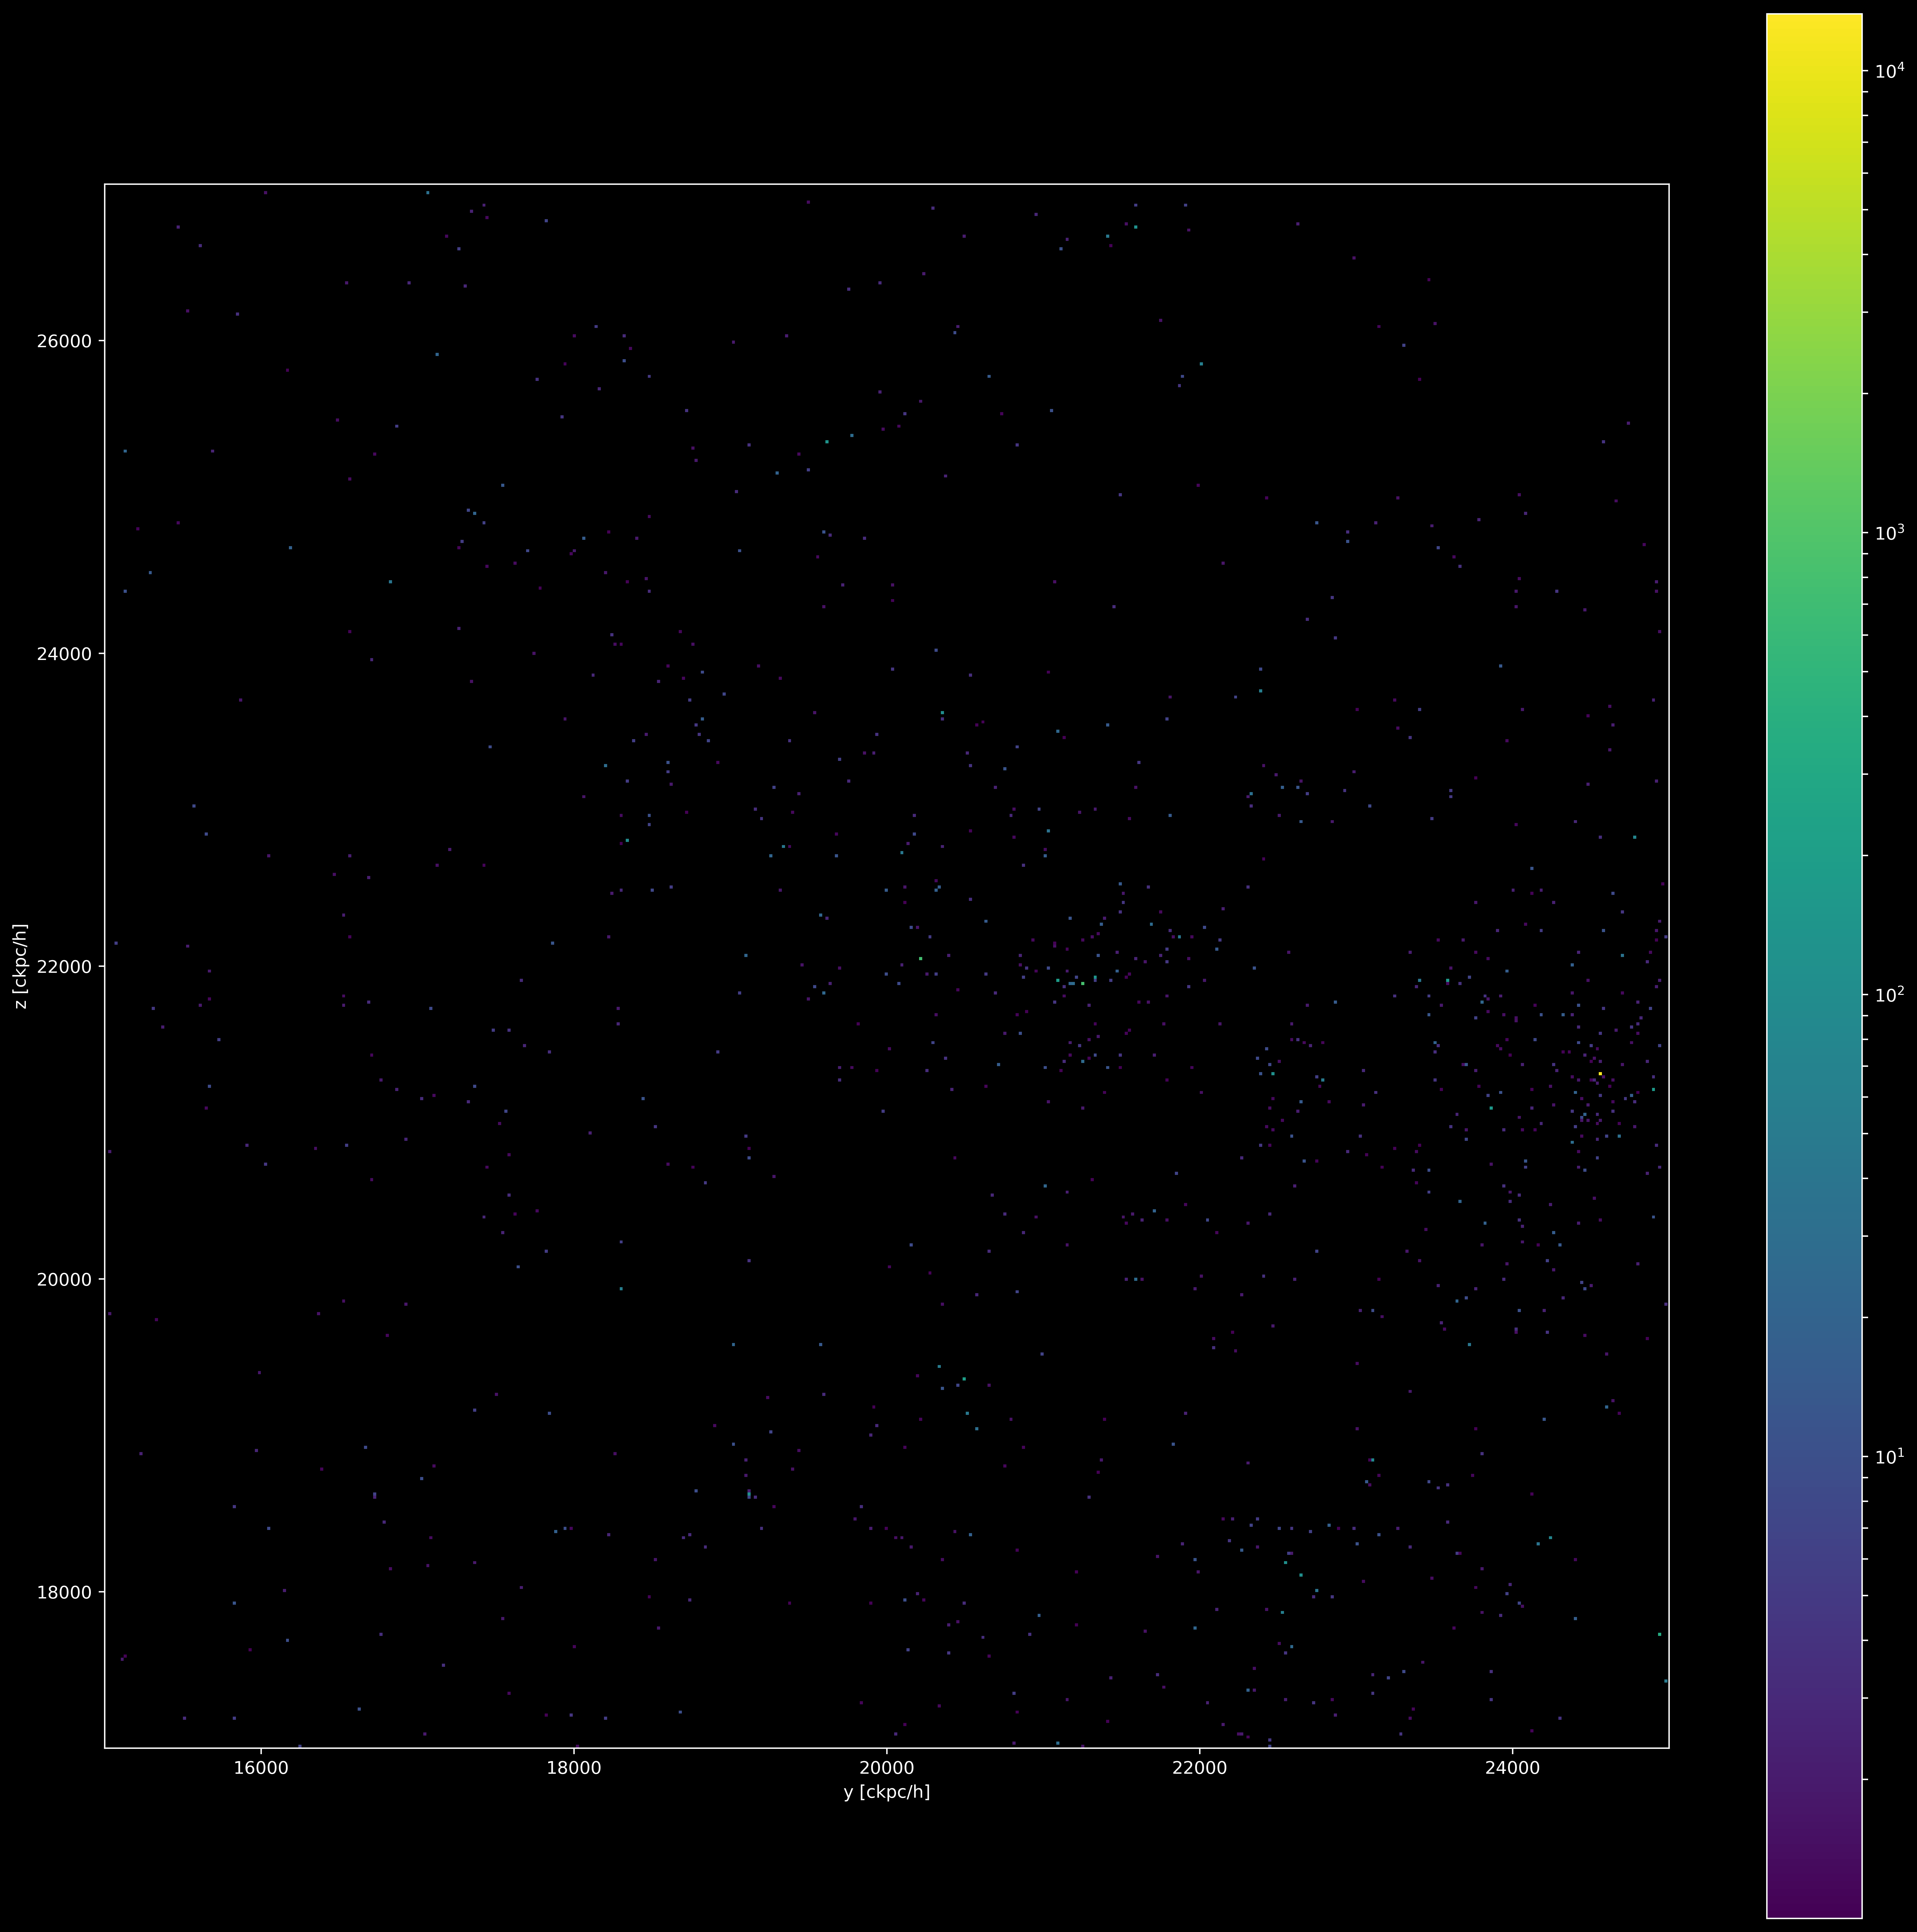

<Figure size 432x288 with 0 Axes>

In [22]:
plt.figure(figsize=(20, 20), dpi=400)

plt.style.use("dark_background")

h, _, _, image = plt.hist2d(subhalo_pos[idx, 1],
                            subhalo_pos[idx, 2],
                            weights=subhalo_mass[idx],
                            norm=mpl.colors.LogNorm(),
                            bins=500)
plt.xlim([15000,25000])
plt.ylim([17000,27000])
plt.xlabel('y [ckpc/h]')
plt.ylabel('z [ckpc/h]')
plt.colorbar(image)

plt.gca().set_aspect(1)
plt.show()
#plt.savefig(savepath+'/{}.png'.format(i))
plt.close('all')
plt.clf()

In [7]:
plt.close('all')
plt.clf()

<Figure size 432x288 with 0 Axes>

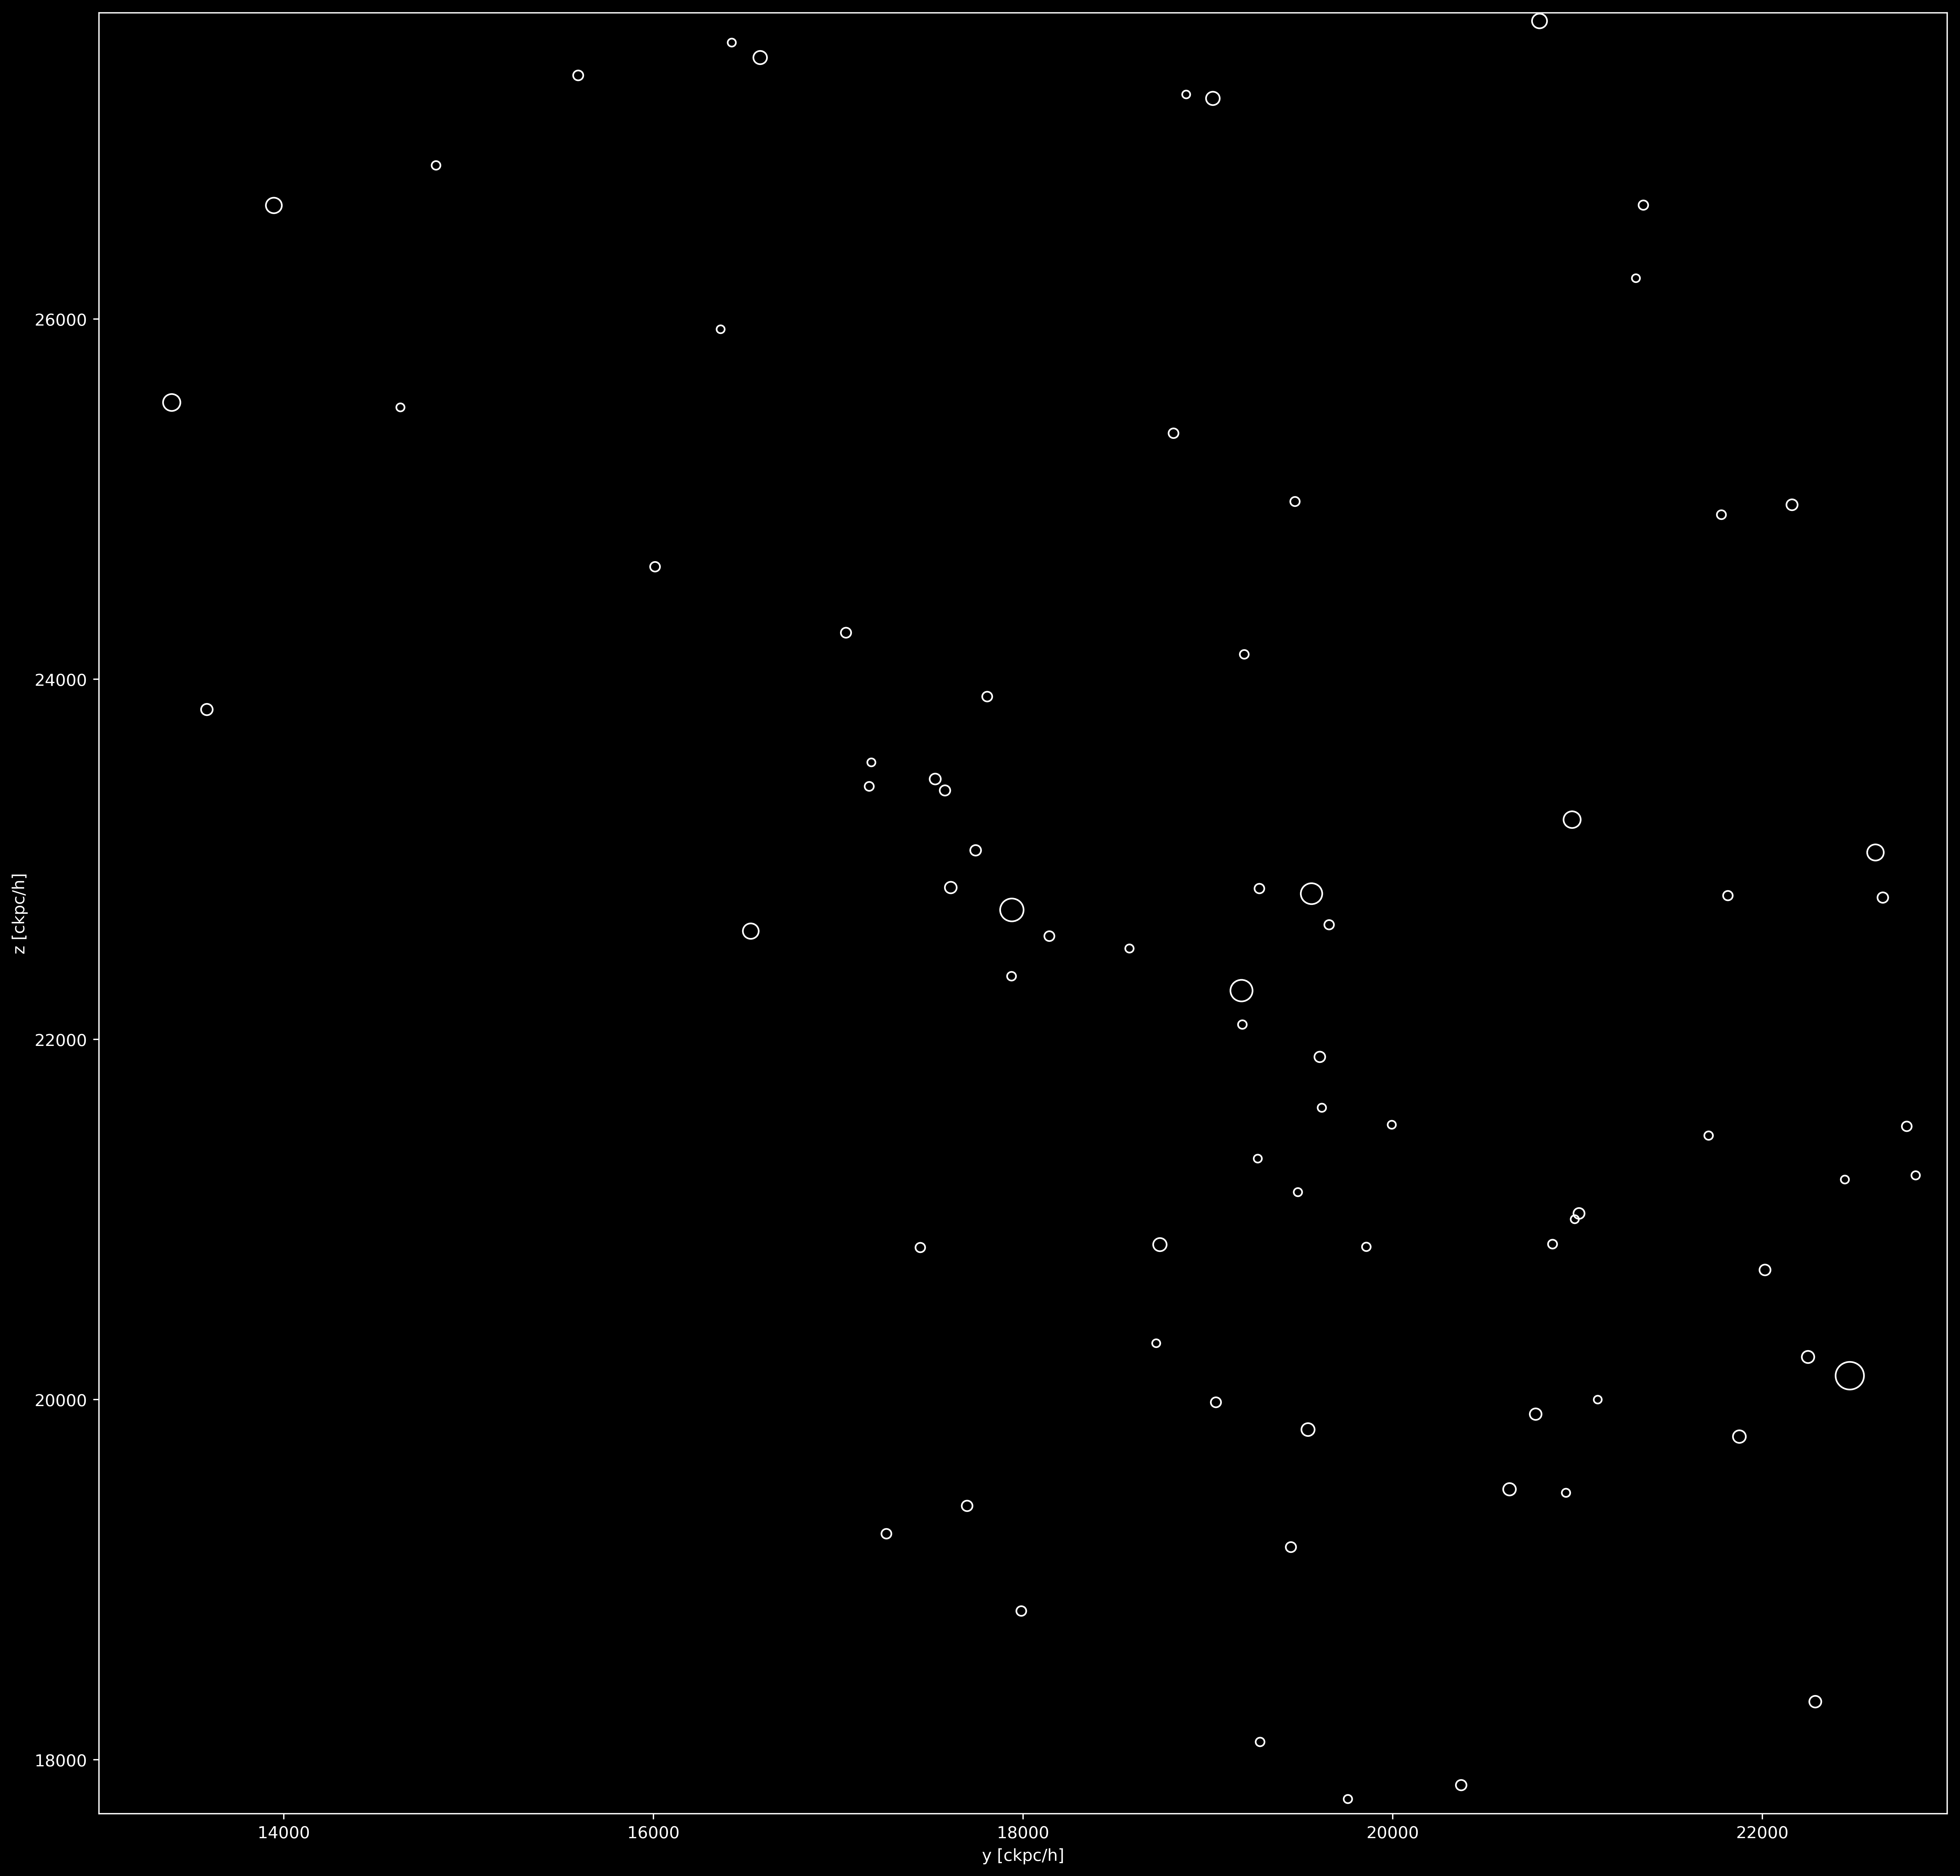

In [8]:
plt.figure(figsize=(20, 20), dpi=400)
plt.style.use("dark_background")
plt.xlim([13000,23000])
plt.ylim([17700,27700])
plt.xlabel('y [ckpc/h]')
plt.ylabel('z [ckpc/h]')
plt.style.use("dark_background")
#plt.scatter(subhalo_pos[idx,1],subhalo_pos[idx,2])


for i in np.where(idx)[0]:
    draw_circle = plt.Circle((subhalo_pos[i,1],subhalo_pos[i,2]), 10*np.power(subhalo_mass[i],1/3), fill=False)
    plt.gcf().gca().add_artist(draw_circle)
    
plt.savefig('LSS.png')
plt.show()